In [2]:
#Para el siguiente proyecto se tomó una base de datos de estudiantes
# de una cierta escuela. La información que se explicíta en la base de datos 
# informa el promedio obtenido en "Lectura", "Escritura" y "Matemática".
# Por otro lado, dicha bae de datos también muestra información del género
# del estudiante, clasifica por etnia,y muestra el grado de escolaridad alcanzado por los padres
# de dichos estudiantes.

# En el siguiente proyecto se intentará contestar tres interrogntes.

# 1- ¿Realmente el género influye en el desempeño de matemática?
# 2- ¿Influye el grado de escolridad alcanzado por los padres?
# 3- Existe algún tipo de correlación acorde al desempeño, en todas
# o algunas de las disciplinas?
 

In [102]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
import scipy.stats as ss
%matplotlib inline

In [3]:
#Se analiza el archivo
data = pd.read_csv('exams.csv')
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [4]:
#Chequeamos el tipo de dato para cada columna
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
#Vemos cuántas filas tiene el archio
data.shape

(1000, 8)

In [6]:
#Observamos las caraterísticas estadísticas básiacs del archivo
data.describe() 

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [ ]:
# El promedio general ronda entre los 66 y 68 aproximadamente,
# con una desviación estándar de 15.428 apróx.
# Se observa que existe la calificación de 100.

In [7]:
#Se chequea si hay algún valor perdido, con el fin de eliminarlo, de ser necesario
print(data.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [8]:
#Observamos la frecuencia acumulada para cada género
data['gender'].value_counts()

male      517
female    483
Name: gender, dtype: int64

In [ ]:
# Tenemos que la muestra es de 1000 estudiantes, de los cuales
# 517 son hombres, y 483 mujeres.

In [9]:
#Et muetra está clasificada por distintos grupos etnicos.
data.iloc[:,1].value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

In [12]:
#Veamos la cantidad de gente que completó el curso de preparación.
data.iloc[:,4].value_counts()

none         665
completed    335
Name: test preparation course, dtype: int64

In [ ]:
#Se observa el promedio general para hombres y mujeres, en cada disciplina.

In [46]:
male = data[data['gender'] == 'male']
female = data[data['gender'] != 'male']

print("Math Score")
print("Male    :",round(male['math score'].sum()/len(male),3))
print("Female  :",round(female['math score'].sum()/len(female),3),'\n')

print("Reading Score")
print("Male    :",round(male['reading score'].sum()/len(male),3))
print("Female  :",round(female['reading score'].sum()/len(female),3),'\n')

print("Writing Score")
print("Male    :",round(male['writing score'].sum()/len(male),3))
print("Female  :",round(female['writing score'].sum()/len(female),3))

Math Score
Male    : 69.385
Female  : 63.197 

Reading Score
Male    : 66.306
Female  : 71.888 

Writing Score
Male    : 64.029
Female  : 71.708


In [14]:
# top 10 promedios
scores = pd.DataFrame(data['math score'] + data['reading score'] + data['writing score'], columns = ["total score"])
scores = pd.merge(data,scores, left_index = True, right_index = True).sort_values(by=['total score'],ascending=False)
scores.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
148,female,group E,bachelor's degree,standard,completed,100,100,100,300
550,female,group E,some college,standard,completed,100,100,100,300
825,male,group E,associate's degree,standard,completed,100,100,100,300
634,female,group D,master's degree,standard,completed,100,100,100,300
281,male,group E,associate's degree,standard,completed,100,100,100,300
593,male,group D,bachelor's degree,standard,completed,100,97,100,297
96,female,group E,associate's degree,standard,completed,95,100,100,295
754,female,group A,master's degree,standard,completed,94,100,100,294
626,female,group B,master's degree,standard,completed,96,98,100,294
816,female,group C,associate's degree,standard,completed,94,99,100,293


In [ ]:
# A continuación se compararán los promedios de cada categoría
# acorde al género de cada estudiante.

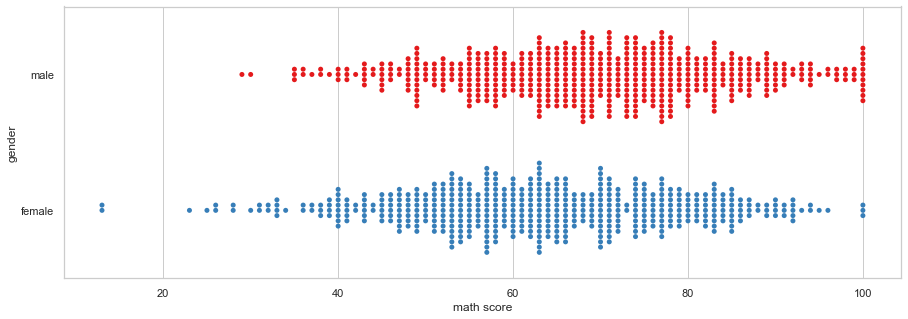

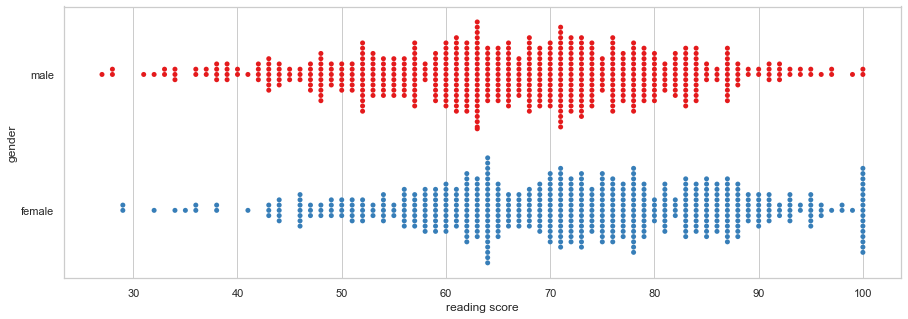

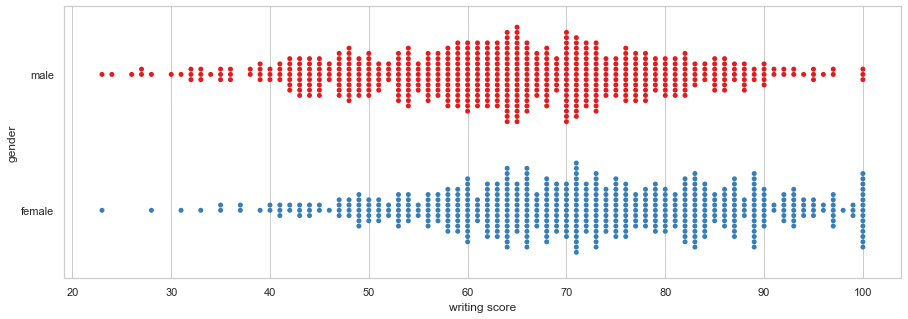

In [114]:
sns.set_style('whitegrid')

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'math score', y='gender', data = data, palette = 'Set1') #math score
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'reading score', y='gender', data = data, palette = 'Set1') #reading score
plt.show()

f, ax = plt.subplots(1,1,figsize= (15,5))
ax = sns.swarmplot(x = 'writing score', y='gender', data = data, palette = 'Set1') #writing score
plt.show()

In [ ]:
# Se hará un test de hipótesis para constatar si los mejores
# promedios provienen de estudiantes de género masculino.

In [ ]:
# Primero es necesario corroborar si los datos provienen de una 
# distribución normal. Eso es necesario para poder aplicar el t-test.

In [106]:
prom_male=male["math score"]
prom_fem=female["math score"]

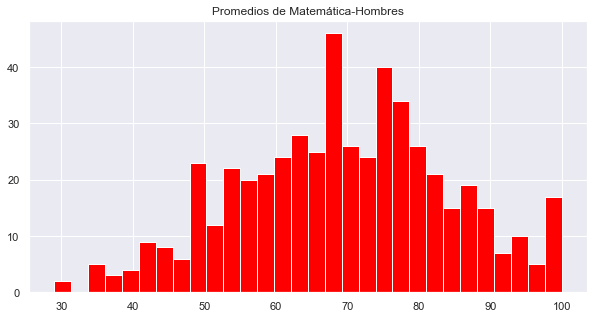

In [109]:
f, ax = plt.subplots(1,1,figsize=(10,5))

plt.hist(prom_male, 30, color = 'red')
ax.set(title = "Promedios de Matemática-Hombres")

plt.show()

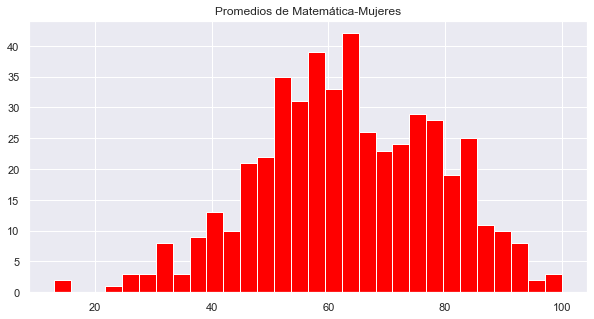

In [111]:
f, ax = plt.subplots(1,1,figsize=(10,5))

plt.hist(prom_fem, 30, color = 'red')
ax.set(title = "Promedios de Matemática-Mujeres")

plt.show()

In [ ]:
# Se puede verificar que los datos provienen de una distribución normal.

In [ ]:
# Utilizaremos el test de levene, esto es para saber si 
# hay una similitud en las varianzas.

In [76]:
from scipy.stats import levene

In [ ]:
# Test de levene de varianzas iguales:

In [96]:
levene(prom_male,prom_fem)

LeveneResult(statistic=1.197026773312938, pvalue=0.2741807336055263)

In [ ]:
#Esto brinda la información del p-valor, en este caso de 0.2741...
#Por lo tanto, no podemos asumir que hay igualdad de varianzas.

In [ ]:
#Se hará el t-test con varianzas no iguales.

In [105]:
t_stat, p_val= ss.ttest_ind(prom_male, prom_fem, equal_var=False)
t_stat, p_val


(6.4662843794899585, 1.5792711252191018e-10)

In [ ]:
# el resultado anterior arroja un p valor muy pequeño, menor a 0.05.
# Por tal motivo, rechazamos la hipótesis nula y podemos afirmar que
# la diferencia entre las medias de los pomedios es significativa.
# Aseguramos con un nivel de significancia del 95 por ciento que 
# el desempeño en matemática obtenido en los hombres es mayor al de las mujeres.
# Cabe aclarar que no se está analizando las causas de esto, sólo se intenta 
# concluir con los datos que se tienen.

In [ ]:
# Queda por hacer ( no se hará en este caso)  el análisis para los desempeños en escritura y lectura,
# donde parece demostrar un mejor desempeño el género femenino. 

In [62]:
# Aspectos etnicos y escolaridad de los padres

In [ ]:
# Tipo de distribución de los datos.

In [ ]:
# Es importante saber si las distribuciones provienen o no de 
# una distribución normal. Esto servirá para realizar test de hipótesis
# y para contrastar correlación entre distintos campos de la base de datos.

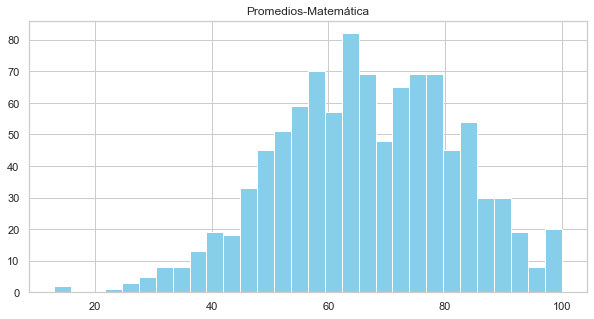

In [115]:
f, ax = plt.subplots(1,1,figsize=(10,5))

plt.hist(data['math score'], 30, color = 'skyblue')
ax.set(title = "Promedios-Matemática")

plt.show()

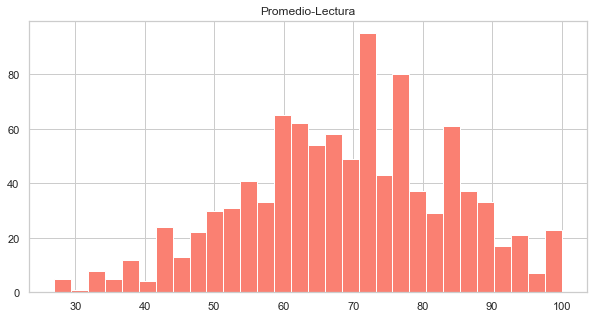

In [116]:
f, ax = plt.subplots(1,1,figsize=(10,5))

plt.hist(data['reading score'], 30, color = 'salmon')
ax.set(title = "Promedio-Lectura")

plt.show()

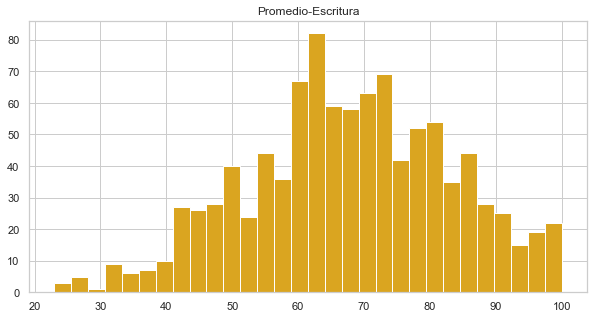

In [117]:
f, ax = plt.subplots(1,1,figsize=(10,5))

plt.hist(data['writing score'], 30, color = 'goldenrod') #visit https://xkcd.com/color/rgb/ if you want to see more colors
ax.set(title = "Promedio-Escritura")

plt.show()

In [ ]:
# En los tres gráficos anteriores se puede observar que 
# la mayoría de los promedios se encuentran entre los rangoas 60 y 80
# para esta muestra.

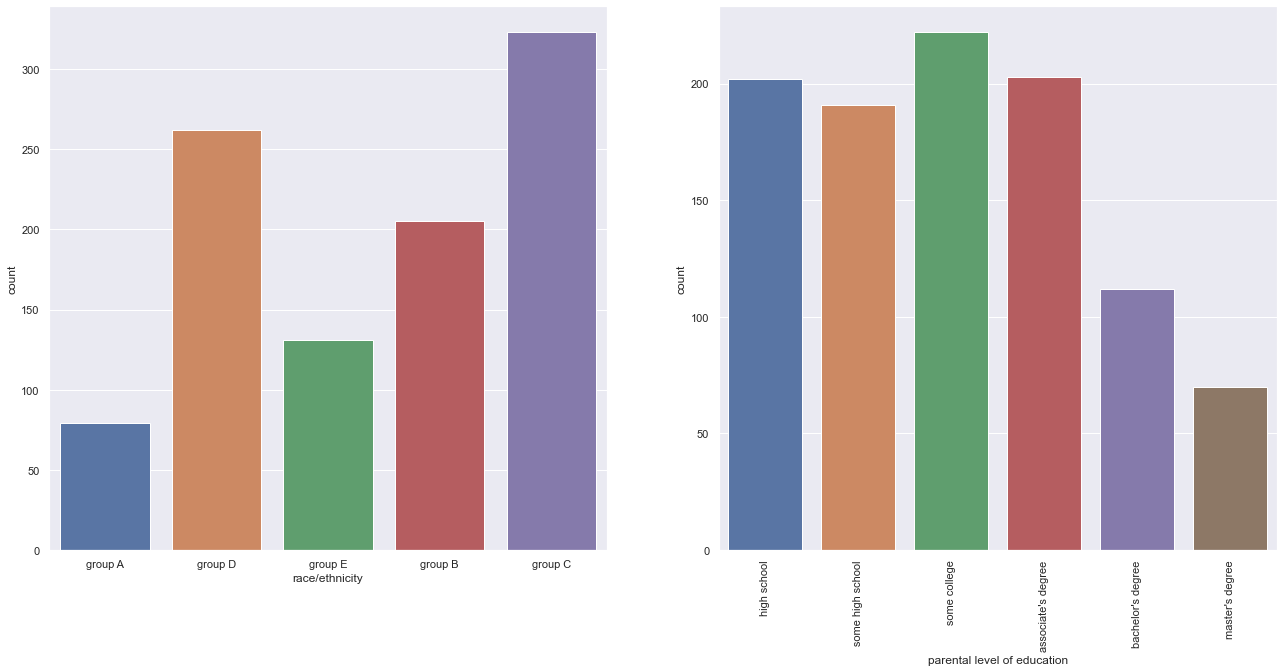

In [18]:
#Comparamos los tipos de etnia con respecto al nivel alcanzado de escolaridad de los padres
#Count Plot
sns.set(style="darkgrid")
f, axs = plt.subplots(1,2, figsize = (22,10))

sns.countplot(x = 'race/ethnicity', data = data, ax = axs[0]) #race / ethnicity
sns.countplot(x = 'parental level of education', data = data, ax = axs[1]) #parental level of education

plt.xticks(rotation=90)

plt.show()

In [ ]:
# Es importante destacar que, en esta muestra, se evidencian
# los distintos grados académicos de los padres, clasificados por etnias.
# Los grupos A y E tienen un menor grado de concurrencia, en concordancia
# con lo que presenta el gráfico de escolaridad alcanzado por los padres.


In [19]:
# Gráfico organizado acorde a género y etnia

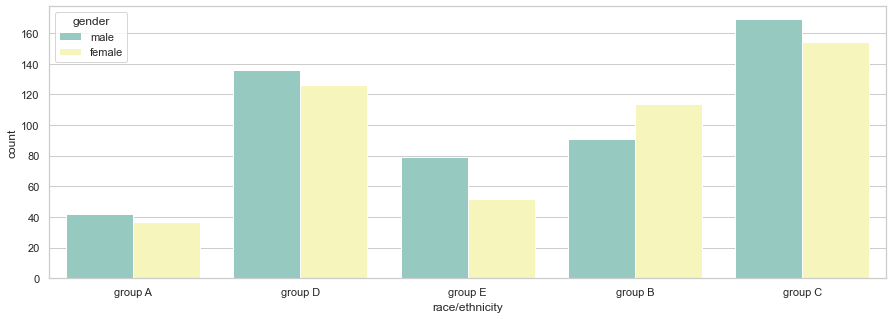

In [120]:
f, ax = plt.subplots(1,1, figsize = (15,5))

sns.countplot(x = 'race/ethnicity', data = data, hue = 'gender', palette = 'Set3') #race / ethnicity

plt.show()

In [21]:
#En los gráficos anteriores ( menos en el grupo B ) se pude observar 
# que, es mayor la cantidad de hombres que de mujeres en cada etnia.

In [121]:
# Relación entre el desempeño de las distintaas disciplinas.

In [ ]:
# A continuación se intentará, en principio a modo visual, ver si 
# podría existir algún tipo de correlación entre los desempeños de 
# lectura, escritura y matemática.

In [ ]:
#Los siguientes gráficos corroboran la distribución normal de los datos
# y más aún, se puede visualizar si las correlaciones podrían ser o no fuertes.

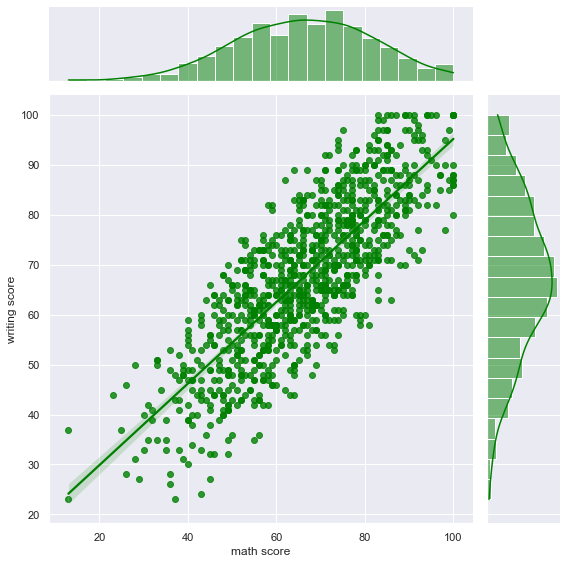

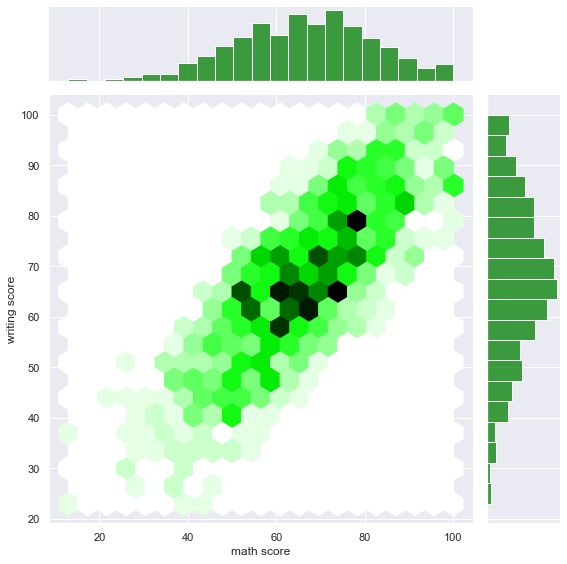

In [23]:
sns.jointplot(x ='math score', y = 'writing score', data = data, color = 'green', height = 8, kind = 'reg')
sns.jointplot(x ='math score', y = 'writing score', data = data, color = 'green', height = 8, kind = 'hex')

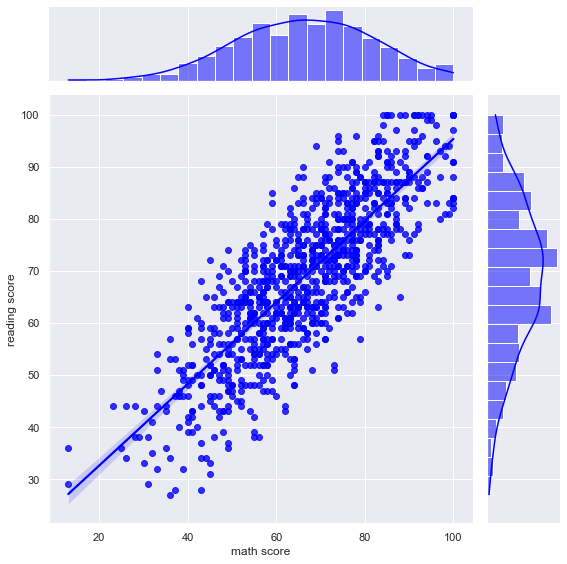

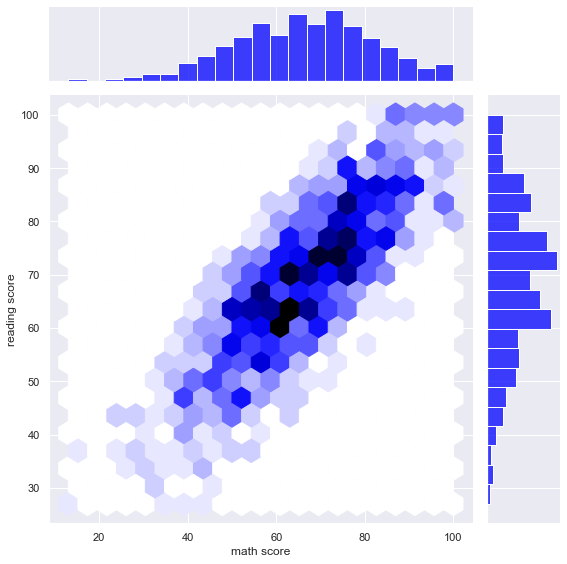

In [24]:
sns.jointplot(x ='math score', y = 'reading score', data = data, color = 'blue', height = 8, kind = 'reg')
sns.jointplot(x ='math score', y = 'reading score', data = data, color = 'blue', height = 8, kind = 'hex')

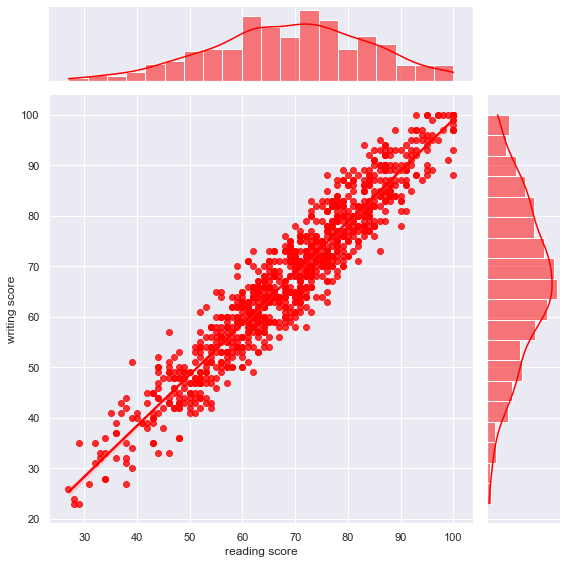

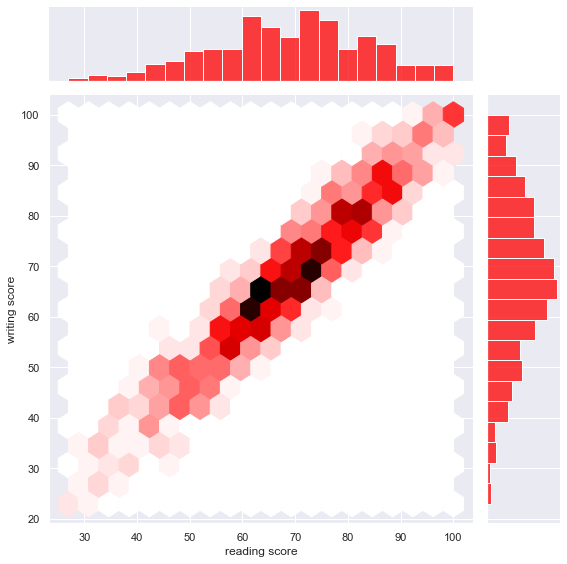

In [25]:
sns.jointplot(x ='reading score', y = 'writing score', data = data, color = 'red', height = 8, kind = 'reg')
sns.jointplot(x ='reading score', y = 'writing score', data = data, color = 'red', height = 8, kind = 'hex')

In [26]:
# Se observva una correlación fuerte entre los datos correspondientes
# al campo de lectura y de escritura. Los estudiants que presentan
# buen desempeño en lectura también lo hacen en escritura. De la misma manera,
# lo estudiantes que tienden a presentar menos rendimiento en lectura 
# también presentan un menor rendimiento en escritura.

In [ ]:
# Se recuera que con un promedio mayor o igual a 60 se aprueba, con
# este dato, se verá el porcentaaje de los estudiantes aprobados y desaprobados
# en cada disciplina.

In [28]:
#math score
passed = len(data[data['math score'] >= 60])
not_passed = 1000 - passed

percentage1 = [passed, not_passed]

#reading score
passed = len(data[data['reading score'] >= 60])
not_passed = 1000 - passed

percentage2 = [passed, not_passed]

#writing score
passed = len(data[data['writing score'] >= 60])
not_passed = 1000 - passed

percentage3 = [passed, not_passed]

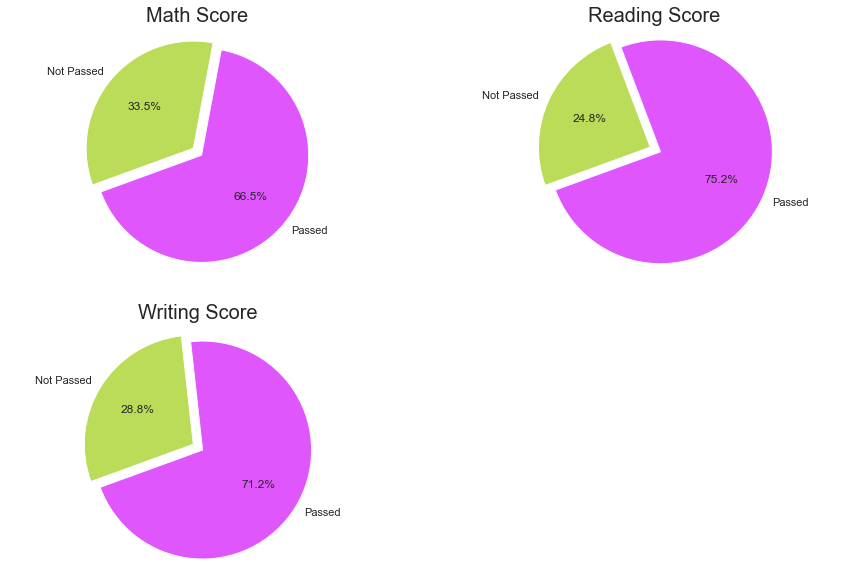

In [29]:
labels = "Passed", "Not Passed"

f, axs = plt.subplots(2,2, figsize=(15,10))

#Math Score
axs[0,0].pie(percentage1, labels = labels, explode=(0.05,0.05), autopct = '%1.1f%%', startangle = 200, colors = ["#e056fd", "#badc58"])
axs[0,0].set_title("Math Score", size = 20)
axs[0,0].axis('equal')

#Reading Score
axs[0,1].pie(percentage2, labels = labels, explode=(0.05,0.05), autopct = '%1.1f%%', startangle = 200, colors = ["#e056fd", "#badc58"])
axs[0,1].set_title("Reading Score", size = 20)
axs[0,1].axis('equal')

#Writing Score
axs[1,0].pie(percentage3, labels = labels, explode=(0.05,0.05), autopct = '%1.1f%%', startangle = 200, colors = ["#e056fd", "#badc58"])
axs[1,0].set_title("Writing Score", size = 20)
axs[1,0].axis('equal')

f.delaxes(axs[1,1]) #deleting axs[1,1] so it will be white blank

plt.show()


In [ ]:
# En este gráfico también se puede confirmar la correlación entre
# en rendimiento presentado en lectura y escritura.

In [ ]:
# A continuación se contraastará esto con datos precisos.

In [122]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


In [ ]:
#Se puede observar que efecivamente hay una correlación significativa
#entre los rendimientos de lectura y escritura, dejando de lado la posibilidad de establecer 
#correlación con el desempeño en matemática.